In [49]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import plotly.express as px
from pandas.api.types import is_numeric_dtype
import warnings
warnings.filterwarnings("ignore")

In [3]:
df= sns.load_dataset('titanic')
df.head()

survived  pclass     sex   age  ...  deck  embark_town  alive  alone
0         0       3    male  22.0  ...   NaN  Southampton     no  False
1         1       1  female  38.0  ...     C    Cherbourg    yes  False
2         1       3  female  26.0  ...   NaN  Southampton    yes   True
3         1       1  female  35.0  ...     C  Southampton    yes  False
4         0       3    male  35.0  ...   NaN  Southampton     no   True

[5 rows x 15 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
df= df.drop('deck',axis=1)

In [13]:
x = df[["pclass", "sex", "age", "sibsp", "parch", "fare", "embarked",'class','adult_male',"alone"]]
y = df["alive"]

In [14]:
x.head()

pclass     sex   age  sibsp  ...  embarked  class adult_male  alone
0       3    male  22.0      1  ...         S  Third       True  False
1       1  female  38.0      1  ...         C  First      False  False
2       3  female  26.0      0  ...         S  Third      False   True
3       1  female  35.0      1  ...         S  First      False  False
4       3    male  35.0      0  ...         S  Third       True   True

[5 rows x 10 columns]

In [17]:
col = x.columns
le=LabelEncoder()

In [25]:
for i in col:
    if not is_numeric_dtype(x[i]):
        x[i]=le.fit_transform(x[i])
x.head()

pclass  sex   age  sibsp  parch     fare  embarked  class  adult_male  alone
0       3    1  22.0      1      0   7.2500         2      2        True  False
1       1    0  38.0      1      0  71.2833         0      0       False  False
2       3    0  26.0      0      0   7.9250         2      2       False   True
3       1    0  35.0      1      0  53.1000         2      0       False  False
4       3    1  35.0      0      0   8.0500         2      2        True   True

In [26]:
x["age"]=x["age"].fillna(x['age'].mean())

In [30]:
x["adult_male"]=x["adult_male"].astype(int)
x["alone"]=x["alone"].astype(int)

In [32]:
x.head()

pclass  sex   age  sibsp  parch     fare  embarked  class  adult_male  alone
0       3    1  22.0      1      0   7.2500         2      2           1      0
1       1    0  38.0      1      0  71.2833         0      0           0      0
2       3    0  26.0      0      0   7.9250         2      2           0      1
3       1    0  35.0      1      0  53.1000         2      0           0      0
4       3    1  35.0      0      0   8.0500         2      2           1      1

In [38]:
mms=MinMaxScaler()
for i in col:
    if is_numeric_dtype(x[i]):
        x[i]= mms.fit_transform(x[[i]])
x.head()

pclass  sex       age  sibsp  ...  embarked  class  adult_male  alone
0     1.0  1.0  0.271174  0.125  ...  0.666667    1.0         1.0    0.0
1     0.0  0.0  0.472229  0.125  ...  0.000000    0.0         0.0    0.0
2     1.0  0.0  0.321438  0.000  ...  0.666667    1.0         0.0    1.0
3     0.0  0.0  0.434531  0.125  ...  0.666667    0.0         0.0    0.0
4     1.0  1.0  0.434531  0.000  ...  0.666667    1.0         1.0    1.0

[5 rows x 10 columns]

In [64]:
mms.fit(x)

MinMaxScaler()

In [53]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=42,test_size=.2)

In [74]:
ytrain

331     no
733     no
382     no
704     no
813     no
      ... 
106    yes
270     no
860     no
435    yes
102     no
Name: alive, Length: 712, dtype: object

In [75]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
model= dt.fit(xtrain,ytrain)
model.score(xtrain,ytrain)

0.8469101123595506

In [76]:
ypred=model.predict(xtest)

In [77]:
accuracy_score(ytest,ypred)

0.8100558659217877

In [78]:
col=x.columns.to_list()
col

['pclass',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked',
 'class',
 'adult_male',
 'alone']

[Text(0.5192307692307693, 0.9166666666666666, 'adult_male <= 0.5\ngini = 0.469\nsamples = 712\nvalue = [444, 268]'),
 Text(0.24358974358974358, 0.75, 'class <= 0.75\ngini = 0.411\nsamples = 280\nvalue = [81.0, 199.0]'),
 Text(0.38141025641025644, 0.8333333333333333, 'True  '),
 Text(0.1282051282051282, 0.5833333333333334, 'fare <= 0.291\ngini = 0.069\nsamples = 140\nvalue = [5, 135]'),
 Text(0.07692307692307693, 0.4166666666666667, 'fare <= 0.057\ngini = 0.048\nsamples = 122\nvalue = [3, 119]'),
 Text(0.05128205128205128, 0.25, 'fare <= 0.055\ngini = 0.094\nsamples = 61\nvalue = [3, 58]'),
 Text(0.02564102564102564, 0.08333333333333333, 'gini = 0.064\nsamples = 60\nvalue = [2, 58]'),
 Text(0.07692307692307693, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.10256410256410256, 0.25, 'gini = 0.0\nsamples = 61\nvalue = [0, 61]'),
 Text(0.1794871794871795, 0.4166666666666667, 'fare <= 0.298\ngini = 0.198\nsamples = 18\nvalue = [2, 16]'),
 Text(0.15384615384615385, 

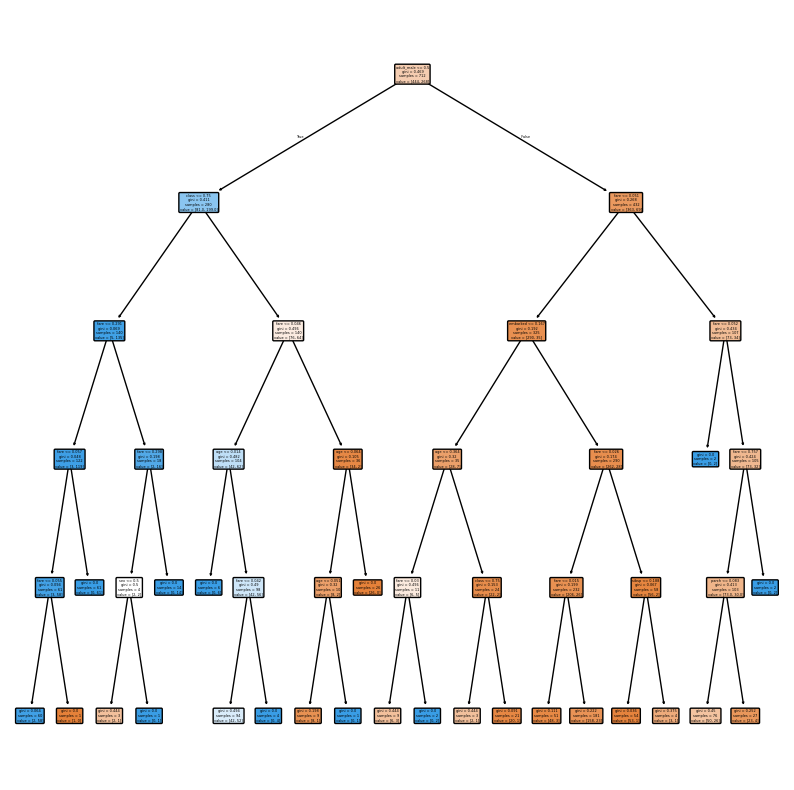

In [79]:
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(model,filled=True,rounded=True,feature_names=col)

In [80]:
import pickle
with open("titanic_model.pkl",'wb') as file:
    pickle.dump(model,file)

In [81]:
import pickle

with open('scaler.pkl', 'wb') as f:
    pickle.dump(mms, f)


In [84]:
import numpy as np
features = np.array([[3,	1,	35.0,	0,	0	,8.0500	,2	,2	,1,	1]])
prediction = model.predict(features),
print(prediction)



(array(['yes'], dtype=object),)
